<a href="https://colab.research.google.com/github/miguelzaga/Machine-Learning-Techniques/blob/main/Taller_1/Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="../Laboratorios.png" ><br>
# Machine Learning Techniques - ISIS4219

Primer Semestre - 2024




## Integrantes

*   Julian Mora.
*   Miguel Zapata.



## **Problema**

Las enfermedades cardiovasculares son la principal causa de muerte en el mundo, y se calcula que cobran 17,9 millones de vidas al año (OMS). La enfermedad de las arterias coronarias es el tipo más común de enfermedad cardíaca y se produce debido a las obstrucciones (placa) desarrolladas en el interior de las arterias coronarias (vasos sanguíneos que alimentan los músculos del corazón). Los cardiólogos utilizan diversas técnicas de imagen y mediciones invasivas de la presión arterial para examinar y controlar la gravedad de dichas obstrucciones. <br>
Los factores de riesgo conductuales más importantes de estas enfermedades son una dieta poco saludable, la inactividad física, el consumo de tabaco y el uso nocivo del alcohol. Los efectos de los factores de riesgo pueden manifestarse en las personas en forma de aumento de la presión arterial, aumento de la glucosa en sangre, aumento de los lípidos en sangre y sobrepeso y obesidad.
Identificar a las personas con mayor riesgo de sufrir enfermedades cardiovasculares y garantizar que reciban el tratamiento adecuado puede evitar muertes prematuras. Con este objetivo en mente, se quiere utilizar las técnicas de machine learning para construir un modelo que permita predecir qué pacientes pueden estar en riesgo de padecer este tipo de cardiopatía.<br><br>
Referencias. <br>



OMS (s.f.). “Cardiovascular diseases”. https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1
<br><br>
**Fuente de Datos**: https://www.kaggle.com/agsam23/coronary-artery-disease/version/3


**1. Procesamiento y entendimiento de los datos**

Explore el conjunto de datos proporcionado y prepárelos para el entrenamiento y validación. Dado que este conjunto de datos no incluye un grupo de test, es necesario realizar una división entre entrenamiento y test. Utilice la función train_test_split de sklearn.model_selection para llevar a cabo esta tarea.

¿Que particularidades presentan los datos y qué técnicas de preprocesamiento se pueden aplicar?



**2.  Limpieza y preparación de datos**

Realizar el proceso de limpieza de datos con el fin de asegurar que los datos estén libres de errores, valores nulos, valores atípicos y formatos inconsistentes.

**3. Modelamiento**

El proceso de modelado se refiere a la etapa en la que se construyen y entrenan modelos de machine learning para realizar predicciones o tomar decisiones basadas en datos. En este paso es importante realizar la Selección de Hiperparámetros con el fin de optimizar el modelo.

**4. Predicción**

Una vez realizado el entrenamiento del modelo es necesario realizar una predicción con los datos de prueba, que servira como insumo para la evaluación y/o validación de la calidad del modelo.

## Desarrollo

### 1. Procesamiento y entendimiento de los datos

In [17]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 
from ydata_profiling import ProfileReport


In [2]:
data = pd.read_csv("data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,Male,Typical Angina,145,233,True,Left ventricular hypertrophy,150,No,2.3,Downsloping,0,Fixed,0
1,67,Male,Asymptomatic,160,286,False,Left ventricular hypertrophy,108,Yes,1.5,Flat,3,Normal,2
2,67,Male,Asymptomatic,120,229,False,Left ventricular hypertrophy,129,Yes,2.6,Flat,2,Reversible defect,1
3,37,Male,Nonanginal pain,130,250,False,Normal,187,No,3.5,Downsloping,0,Normal,0
4,41,Female,Atypical Angina,130,204,False,Left ventricular hypertrophy,172,No,1.4,Unsloping,0,Normal,0


In [7]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

La *variable objetivo* es **thal**, la cual tiene tres categorías y las podemos transformar a 0, 1 y 2.

Las *características* presentan los siguientes tipos de variables:
- Numéricas: 5 (age, trestbps, chol, thalach, oldpeak)
- Categóricas: 6 (sex, cp, restecg, slope, ca, class)
- Booleanas: 2 (fbs, exang)

Las que requieren atención son las categóricas. Las podemos transformar dependiendo de la cantidad de categorías; si tienen dos categorías, las volvemos booleanas; si tienen más podemos transformarlas con 'one-hot encoding'.

Adicionalmente podemos retirar la característica *class* porque no esta documentada en la fuente de los datos.

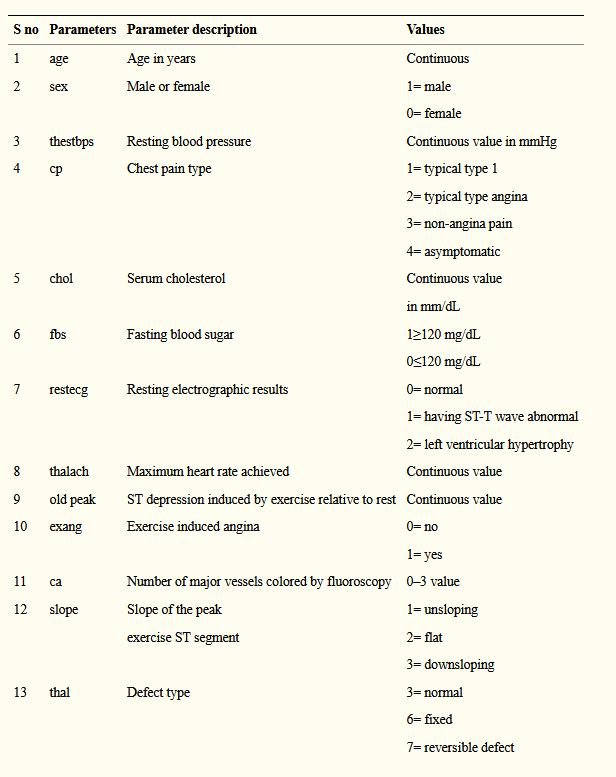

In [16]:
X = data.drop(columns=['thal', 'class'])
y = data["thal"]
print(X.shape)
print(y.shape)

(297, 12)
(297,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train
print(X_train.shape)
print(y_train.shape)
# Test
print(X_test.shape)
print(y_test.shape)

(237, 12)
(237,)
(60, 12)
(60,)


### 2. Limpieza y preparación de los datos